Segmenting car customers and their purchasing power based on a Data collected from Kaggle

In [1]:
#importing basic libraries needed for the analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('data2.csv')

## EDA

In [3]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [5]:
df.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

Clearly this is a cleaned dataset

In [6]:
cat_variables = df.select_dtypes(include = 'object').columns

In [7]:
df['Profession'].replace(df['Profession'].unique(),[0,1])

0     0
1     0
2     1
3     1
4     0
     ..
94    1
95    0
96    1
97    0
98    0
Name: Profession, Length: 99, dtype: int64

In [8]:
for col in cat_variables:
    print(col , ':', df[col].unique())


Profession : ['Salaried' 'Business']
Marrital Status : ['Single' 'Married']
Education : ['Post Graduate' 'Graduate']
Personal loan : ['Yes' 'No']
House Loan : ['No' 'Yes']
Wife Working : ['No' 'Yes' 'm']
Make : ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [202]:
df['House Loan'].value_counts()

No     62
Yes    37
Name: House Loan, dtype: int64

In [9]:

#determining the number of occurence of the unknown value 'm'
df['Wife Working'].value_counts()

Yes    52
No     46
m       1
Name: Wife Working, dtype: int64

In [10]:
#To keep the original dataframe unchange we introduce a copy of the original dataframe
df1 = df.copy()
#Replacing m to No
df1['Wife Working'].replace(['m'],['No'],inplace = True)
for col in cat_variables[:-1]:
    unique_values = df1[col].unique()
    if(unique_values[0] == 'Yes'):
        df1[col].replace(unique_values,[1,0],inplace = True)
    else:
        df1[col].replace(unique_values,[0,1],inplace = True)

In [11]:
df1.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,0,0,0,0,1,0,0,800000,0,800000,i20,800000
1,35,0,1,0,2,1,1,1,1400000,600000,2000000,Ciaz,1000000
2,45,1,1,1,4,1,1,0,1800000,0,1800000,Duster,1200000
3,41,1,1,0,3,0,0,1,1600000,600000,2200000,City,1200000
4,31,0,1,0,2,1,0,1,1800000,800000,2600000,SUV,1600000


In [12]:
df1.describe()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,0.353535,0.848485,0.434343,2.181818,0.323232,0.373737,0.525253,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,0.480500,0.360375,0.498193,1.335265,0.470091,0.486257,0.501903,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [13]:
category_column_mean =df1[cat_variables[:-1]].mean().rename(index = {'Profession': 'Business_men', 'Education':'Graduate','Marrital Status':'Married'})
category_column_mean = category_column_mean.reset_index().rename(columns={'index':'column',0: 'Mean'}).sort_values(by = ['Mean'])

<AxesSubplot:xlabel='Mean', ylabel='column'>

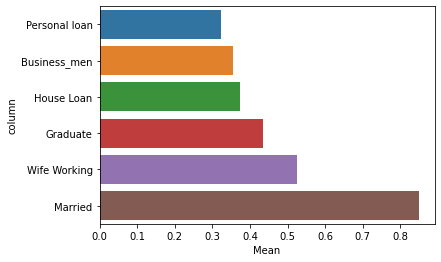

In [14]:

sns.barplot(data = category_column_mean , x = 'Mean', y = 'column' )

In [15]:
numerical_variables = df.select_dtypes(include = 'int64').columns

In [16]:
numerical_variables

Index(['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary',
       'Price'],
      dtype='object')

<AxesSubplot:>

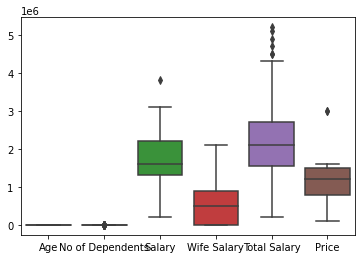

In [17]:
#visualizing the presence of outliers
sns.boxplot(data = df1[numerical_variables])

In [18]:
### detecting outliers
outlier_col = ['Total Salary','Price','Salary']


In [187]:
#we need to treat outliers because the methods that we are going to use for analysis are prone to outlilers
#Method used to find outliers is based on interquartile range
#Imputation is done with 10th and 90th percentile values

df2 = df1.copy()
for col in outlier_col:
    iq = df1[col].quantile([0.25,0.75])
    #finding interquartile range
    iqr = iq[0.75] - iq[0.25]
    #finding the range of majority of data
    mini , maxi =  iq[0.25] - 1.5*iqr , iq[0.75] + 1.5*iqr
    salary_outlier = df1[df1[col] < mini][col].values
    #imputing values
    if salary_outlier.shape[0] > 0:
        df2.replace({col : salary_outlier }, {col : df2[col].quantile(0.10)} ,inplace = True) 
    salary_outlier = df1[df1[col] > maxi][col].values
    if salary_outlier.shape[0] > 0:
        df2.replace({col : salary_outlier }, {col : df2[col].quantile(0.90)} , inplace = True) 

In [20]:
df2.duplicated().sum()

0

<AxesSubplot:>

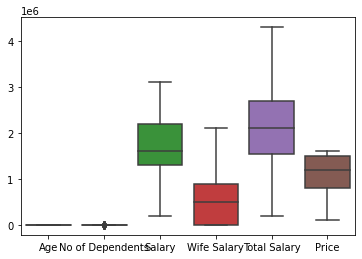

In [21]:
#visuals after the outlier treatment
sns.boxplot(data = df2[numerical_variables])

<AxesSubplot:>

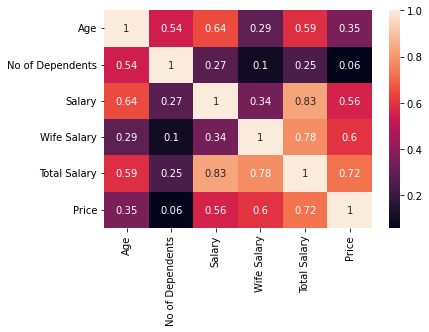

In [23]:
#heatmap to find the relation between the columns
sns.heatmap( data = df2[numerical_variables].corr(),annot=True)

As expected the total salary and Salary are highly correlated

So we could use one of these columns not the both 

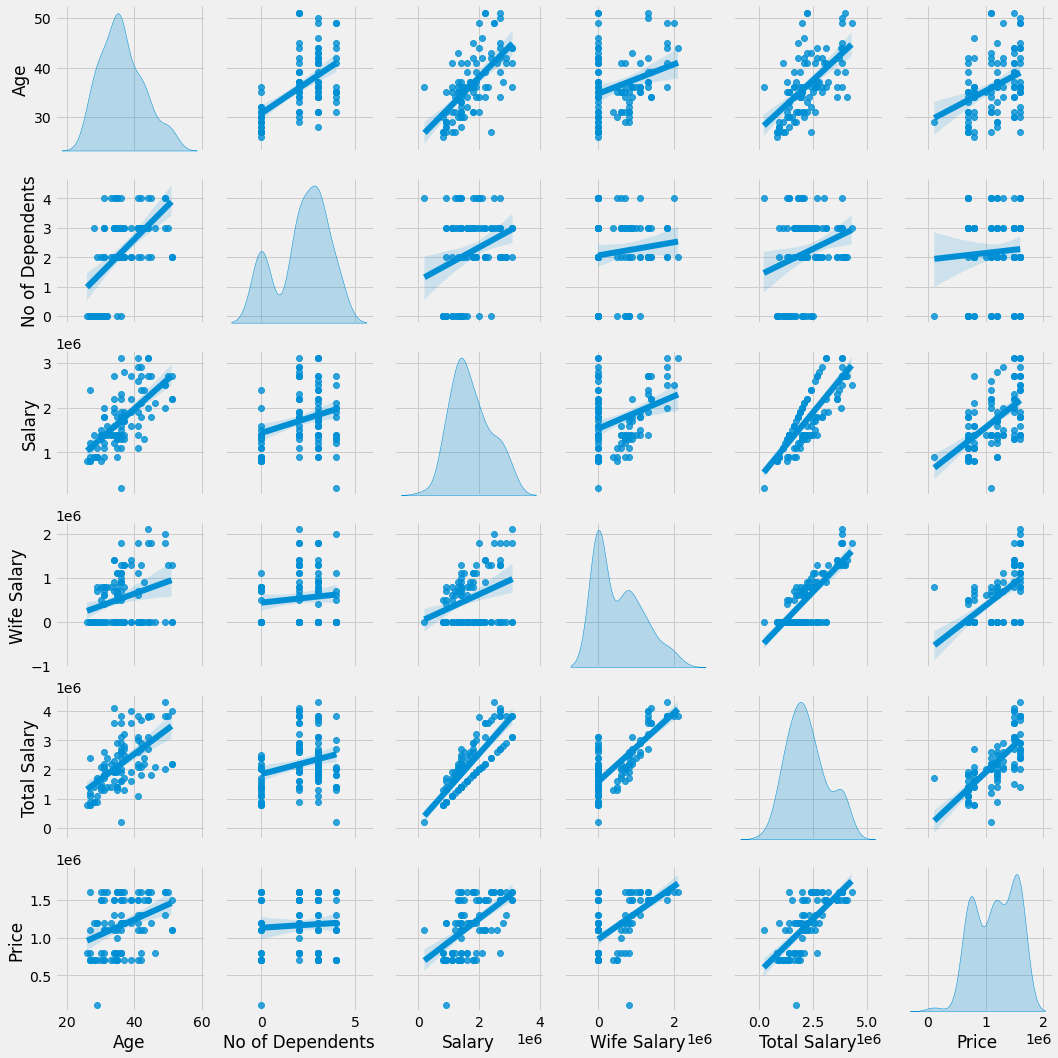

In [188]:
#pairswise graph for numerical variables with the fitted reggression line
#This clearly shows the relation between the above said variables
sns.pairplot(data = df2[numerical_variables],kind = 'reg',diag_kind='kde')

## Segmetation

In [25]:
#using the demographic datas as segmentation variable

demographics_data = df2.iloc[: , :5]
demographics_data['Total Salary'] = df2['Total Salary']
demographics_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Total Salary
0,27,0,0,0,0,800000.0
1,35,0,1,0,2,2000000.0
2,45,1,1,1,4,1800000.0
3,41,1,1,0,3,2200000.0
4,31,0,1,0,2,2600000.0


In [26]:
#Importing libraries to standardise the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(demographics_data)

## Kmeans


In [27]:
#Importing needed libraries for kmeans clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [28]:
#setting the parameters of the kmeans
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

    # A list holds the SSE and silhouette coefficients values for each k
sse = []
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

Text(0.5, 0.98, 'Graphs to find the optimal k value of Kmeans')

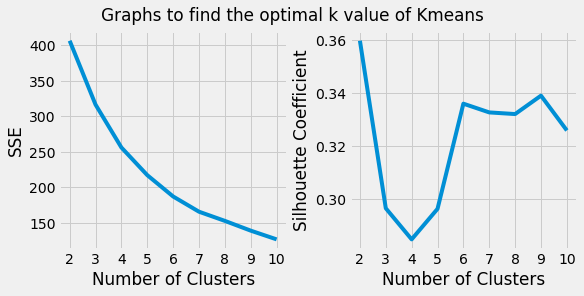

In [29]:
#Plotting graphs to find the optimal value of k
plt.style.use("fivethirtyeight")
fig, axes = plt.subplots(1,2,figsize = (8,4),layout='constrained')

axes[0].plot(range(2, 11), sse)
axes[0].set_xticks(range(2, 11))
axes[0].set_xlabel("Number of Clusters")
axes[0].set_ylabel("SSE")

axes[1].plot(range(2, 11), silhouette_coefficients)
axes[1].set_xticks(range(2, 11))
axes[1].set_xlabel("Number of Clusters")
axes[1].set_ylabel("Silhouette Coefficient")
fig.suptitle('Graphs to find the optimal k value of Kmeans')

Optimal value off k is 7

## Agglomerative Clustering

We will use different methods availabe in the algorithm

### Method 1

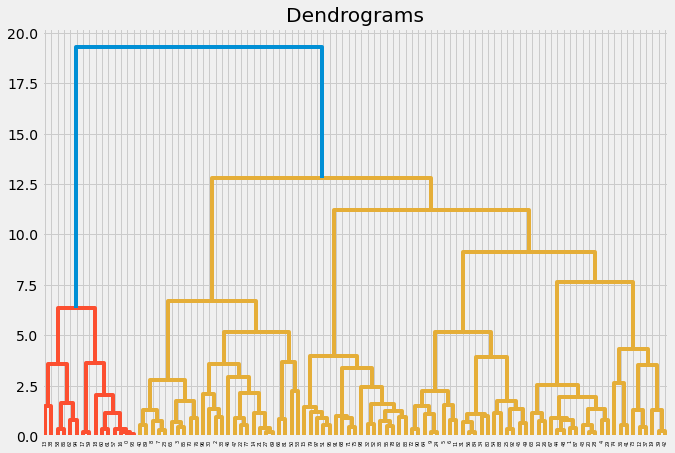

In [30]:
#importing libraries and ploting dendrograms
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='ward'))

Text(0.5, 1.0, 'Graphs to find the optimal number of clusters using ward')

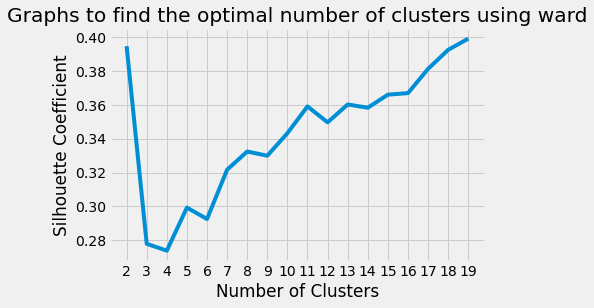

In [31]:
sil_score = []
for cls in range(2,20):
    cluster = AgglomerativeClustering(n_clusters=cls, affinity='euclidean', linkage='ward')  
    label_ward = cluster.fit_predict(scaled_features)
    sil_score.append(silhouette_score(scaled_features, label_ward))
plt.plot(range(2, 20), sil_score)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Graphs to find the optimal number of clusters using ward')

The optimal value of cluster is 11

### Method 2

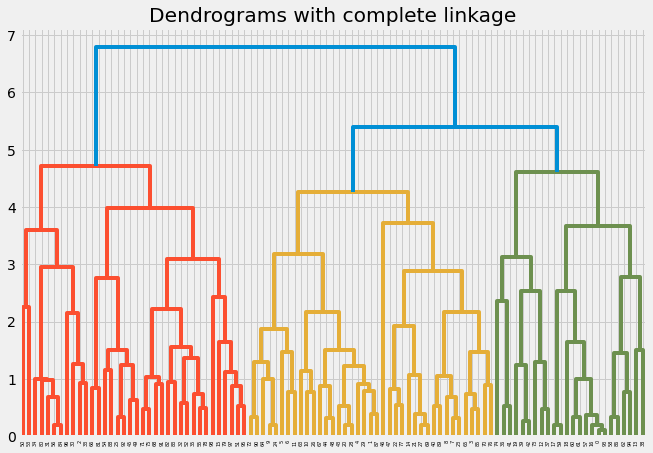

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with complete linkage")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='complete'))

Text(0.5, 1.0, 'Graphs to find the optimal number of clusters using complete')

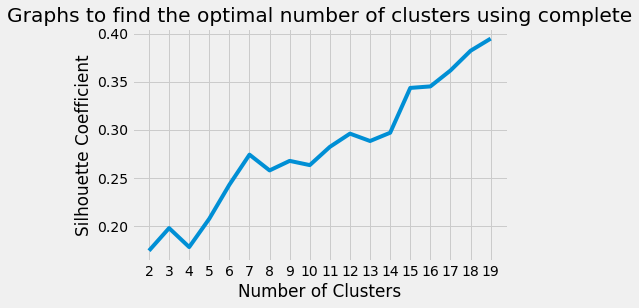

In [33]:
sil_score = []
for cls in range(2,20):
    cluster = AgglomerativeClustering(n_clusters=cls, affinity='euclidean', linkage='complete')  
    label_ward = cluster.fit_predict(scaled_features)
    sil_score.append(silhouette_score(scaled_features, label_ward))
plt.plot(range(2, 20), sil_score)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Graphs to find the optimal number of clusters using complete')

### Method 3

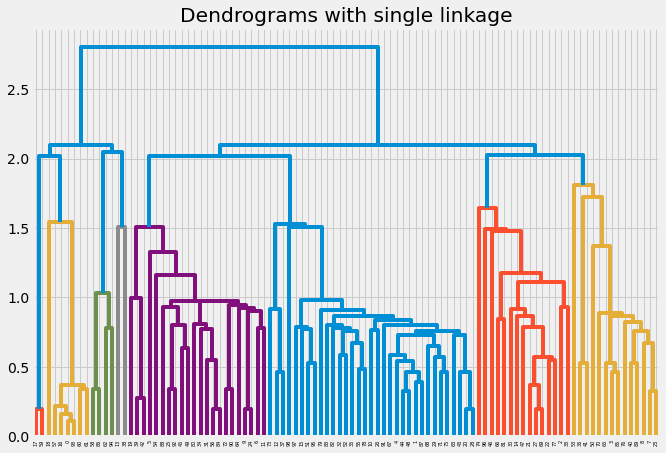

In [34]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms with single linkage")  
dend = shc.dendrogram(shc.linkage(scaled_features, method='single'))

Text(0.5, 1.0, 'Graphs to find the optimal number of clusters using single')

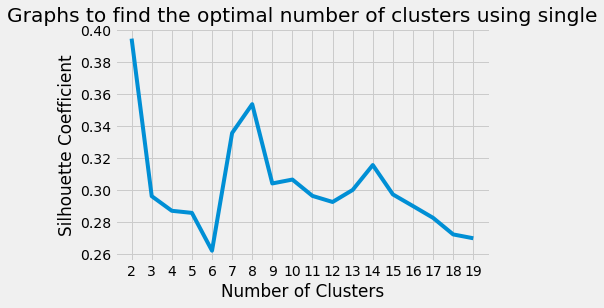

In [36]:
sil_score = []
for cls in range(2,20):
    cluster = AgglomerativeClustering(n_clusters=cls, affinity='euclidean', linkage='single')  
    label_ward = cluster.fit_predict(scaled_features)
    sil_score.append(silhouette_score(scaled_features, label_ward))
plt.plot(range(2, 20), sil_score)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Graphs to find the optimal number of clusters using single')

Optimal number of clusters choosen is 8

### Density-based spatial clustering of applications with noise

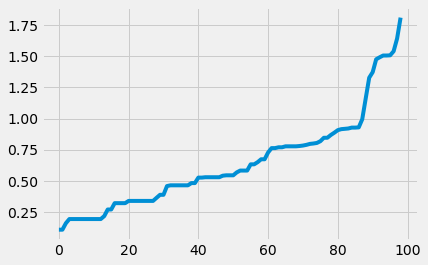

In [37]:
#Finding the optimal epsilion value for dbscan
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(scaled_features) # fitting the data to the object
distances,indices=nbrs.kneighbors(scaled_features) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [38]:
#fitting the model
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 1.5, min_samples = 8).fit(scaled_features) # fitting the model
labels_dbscan = dbscan.labels_ # getting the labels


In [190]:
silhouette_score(scaled_features, labels_dbscan)

0.26597852655793913

Next step after segmenting is profiling segments

## Profiling segments

In [44]:
#creating data profiling table for k means
def create_segment_summary(label):
    df_mean = pd.DataFrame(index= demographics_data.columns)
    data = demographics_data.copy()
    data['class'] = label
    for i in np.sort(np.unique(label),axis = None):
        temp_df = data[data['class'] == i]
        temp_mean = temp_df.mean(axis = 0)
        df_mean['cluster' + str(i+1)] = temp_mean
    df_mean['total'] = data.mean()
    return df_mean ,data


In [191]:
indx = demographics_data.columns

#This function find the significant columns by comparing with total mean 
#significant values are colored pink
#this denoted that the relative absolute difference with the total mean value is more than 50%
#That is it talks about the segments difference from the population
#No statistical test is employed because the characteristics are already extracted by segmenting
def significant_category(segment,df_sign):
    seg = segment
    seg_data = df_sign[seg]
    significant_rows = (np.abs(df_sign['total'] - seg_data  ) >= 1/2 * df_sign['total'] ).replace({True : 1 ,False : 0})*seg_data
    non_significant_rows = seg_data - significant_rows
    return significant_rows , non_significant_rows

#Once significant and non-significant values are found 
#we plot it in graph
#such a way that significant and non-significant features has contrasting colors
#These are ploted using horizontal bar graph
#To compare these with the sample population the total mean is ploted using stem plot
#those are out1, out2 and out3

#Arguments are
# axes --> axes to plot the graph
# col --> segment column name
# y_ticks --> boolean , to eliminate the yticks other than in the first column
# df_cat --> original dataframe with the with segment lables in a seperate column
# cat --> segment labels columns name
#df_sig --> df of all segment means used in finding signigicance
def plot_graph(axes,col, y_ticks,df_cat, cat,df_sig,fig,title):
    axes.set_xscale('log')
    temp_significane = significant_category(segment = col,df_sign = df_sig)
    out1 = axes.barh(width = temp_significane[0] , y = indx  ,height = 0.6,align = 'center',color ='m')
    out2 = axes.barh(width = temp_significane[1] , y = indx  ,height = 0.6,align = 'center',color ='gray')
    out3 = axes.stem( indx,df_sig['total'] , orientation = 'horizontal')

    if (not y_ticks): #To only display the yticks in the first column
        axes.set_yticks(indx,[None]*6)
    #To display the percentage of values in the segment
    state_count = df_cat[df_cat[cat]==int(col[7]) -1 ].shape[0]
    axes.set_title(col + ' , ' + str(round(state_count/df_cat.shape[0]*100)) + '%')
    axes.invert_yaxis() # labels read top-to-bottom
    axes.legend(['significant',"less_sig",'total_mean'])
    axes.grid(False)
    fig.suptitle(title)
    return out1,out2,out3

In [192]:
#Now this function will plot graph based on the classified labels
def Plot(r,c ,label,title):
    # Initialize the matplotlib figure
    df_means ,data = create_segment_summary(label)    
    f, axes = plt.subplots(r,c,figsize=(10,10))
    column_rev_list = df_means.drop(['total'],axis =1).columns[::-1].to_list()
    for i in np.arange(r):
        for j in np.arange(c):
            segment_col = column_rev_list.pop()
            y_ticks = True if (j == 0) else False
            plot_graph(axes = axes[i][j] ,col = segment_col , y_ticks = y_ticks,df_cat = data , cat = 'class',df_sig =df_means ,fig = f,title = title)
            if(len(column_rev_list)== 0 ):
                break


### Profiling of kmeans clusters

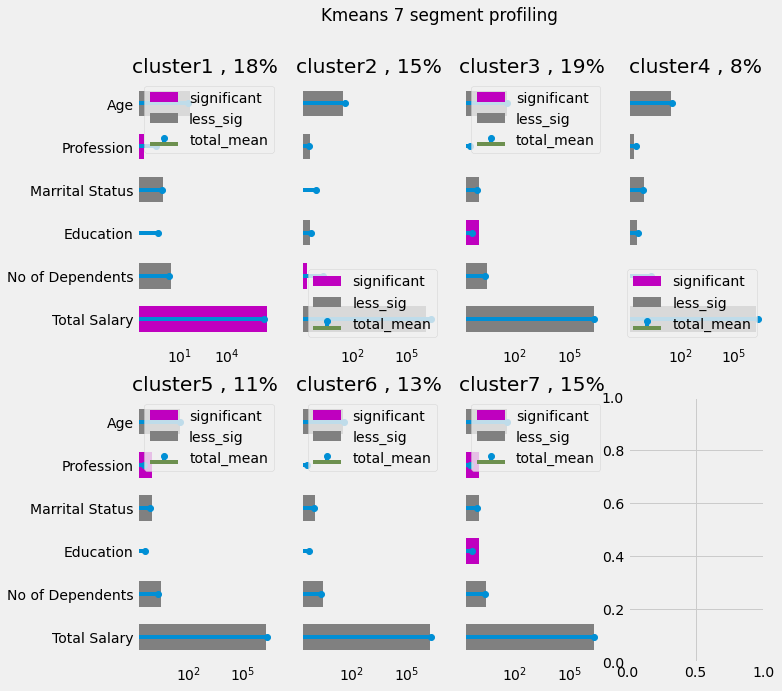

In [193]:
kmeans = KMeans(n_clusters=7, **kmeans_kwargs)
kmeans.fit(scaled_features)
labels_kmeans = kmeans.labels_
Plot(2,4,labels_kmeans , 'Kmeans 7 segment profiling')

### Profile of Agglomerative clustering with ward linkage

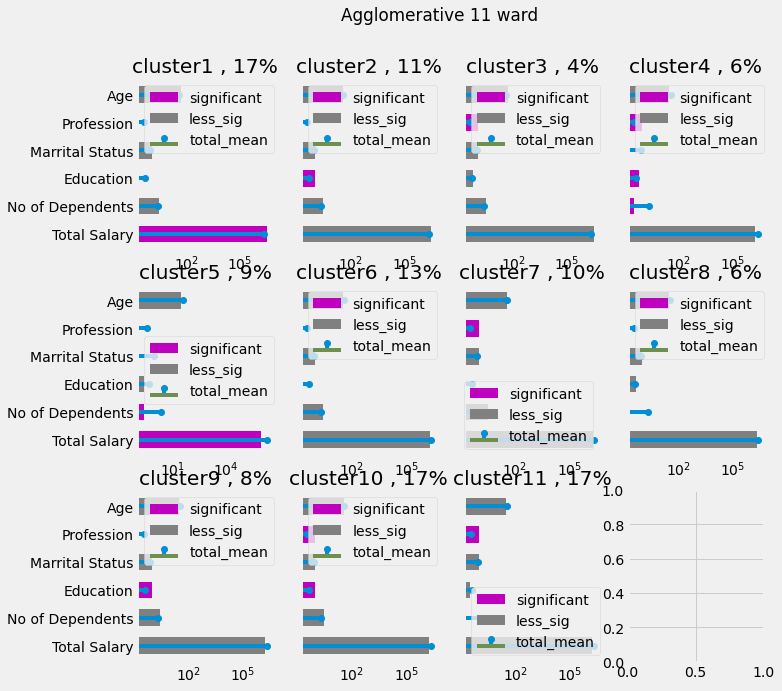

In [194]:
cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')  
label_ward = cluster.fit_predict(scaled_features)
Plot(3,4,label_ward,"Agglomerative 11 ward")

### Profile of Agglomerative clustering with single linkage

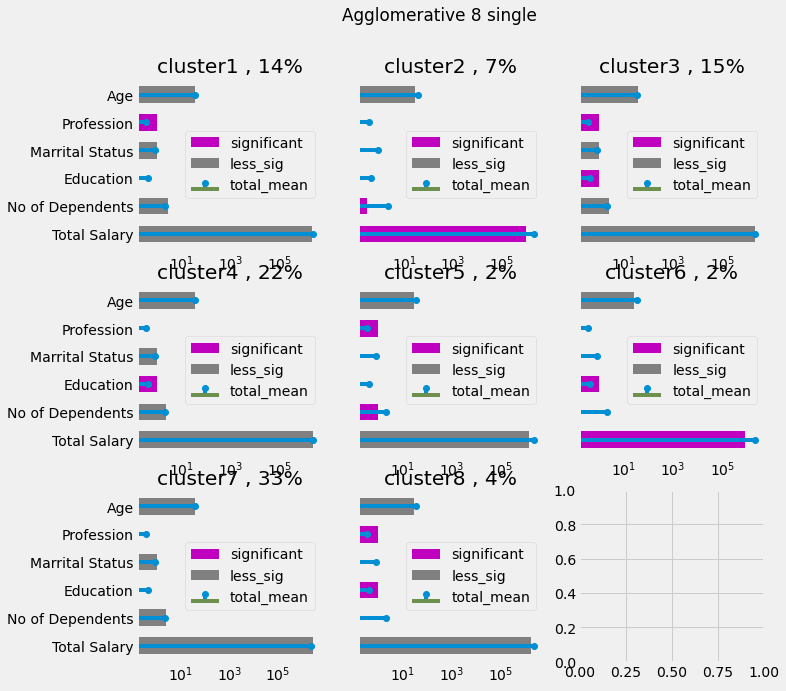

In [203]:
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single')  
label_single = cluster.fit_predict(scaled_features)
Plot(3,3,label_single,"Agglomerative 8 single")

### Profile of Dbscan

In [ ]:
Density-based spatial clustering of applications with noise

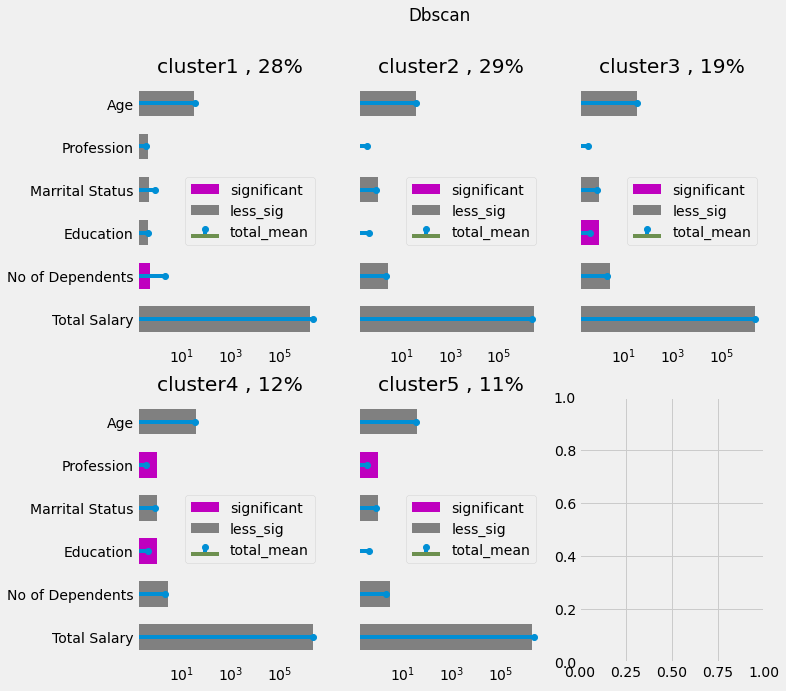

In [196]:

Plot(2,3,labels_dbscan+1,"Dbscan")

This model fails to bring importance to the feature Total Salary

## Describing segments

In [197]:
descriptive_data = df2.drop(demographics_data.columns.to_list(),axis = 1)

In [198]:
label_dict = {"label_kmean" : labels_kmeans , "label_AggWard": label_ward , "label_AggSingle" : label_single,"labels_dbscan" : labels_dbscan}

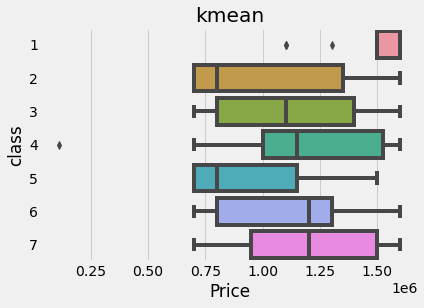

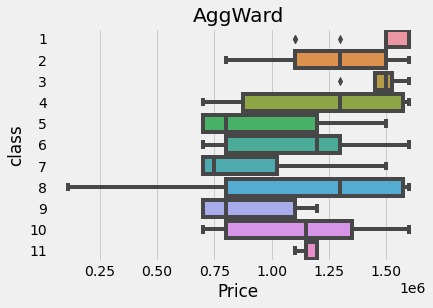

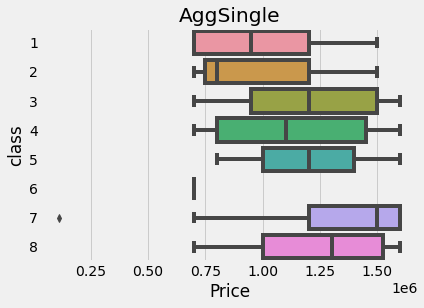

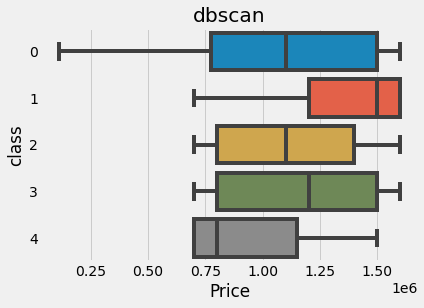

In [199]:
for ind in label_dict:
    data = pd.DataFrame({'Price' : descriptive_data["Price"],'class' : label_dict[ind]+1})
    sns.boxplot(data = data , x = 'Price' , y= 'class' ,orient= 'h')
    plt.title(ind.split('_')[1])
    plt.show()

Members of segment1 of kmeans , segment 1 and 3 of Aggward, segment 7 of AggSingle , segment 1 of dbscan have bought expensive cars




Members of segment 6 in AggSingle only bought less expensive cars as they are mostly postgraduates and with less salary

In [183]:
import scipy.stats as stats
def chi_sq_test(cross_tabs):
    """
    Prints the Chi-Squared Statistic, p-value, and degress of freedom from a Chi-Squared test.
    
    Args:
        cross_tabs: A crosstab dataframe.
    """
    chi2, p, dof, con_table = stats.chi2_contingency(cross_tabs)
    print(f'chi-squared = {chi2}\np value= {p}\ndegrees of freedom = {dof}')


In [184]:
from statsmodels.graphics.mosaicplot import mosaic

def describe_var(var):
    fig ,axes = plt.subplots(2,2,figsize = (14,10))
    j = 0
    for i , label  in enumerate(label_dict):
        descriptive_data_dum = descriptive_data.copy()
        descriptive_data_dum[label] = label_dict[label]+1
        mosaic(descriptive_data_dum, [label,var] , ax= axes[int(i/2)][j],title = label,statistic = True)
        j = (j+1)%2

        crosstable = pd.crosstab(descriptive_data_dum[var],descriptive_data_dum[label])
        print('Stat for ' ,label.split('_')[1] )
        print('-'*30)
        chi_sq_test(crosstable)
        print()

In [185]:
descriptive_data.columns

Index(['Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Make', 'Price'],
      dtype='object')

Stat for  kmean
------------------------------
chi-squared = 6.267269359175781
p value= 0.39392609280519025
degrees of freedom = 6

Stat for  AggWard
------------------------------
chi-squared = 7.394620365367731
p value= 0.6877386211598253
degrees of freedom = 10

Stat for  AggSingle
------------------------------
chi-squared = 6.101415911513858
p value= 0.5279587874883949
degrees of freedom = 7

Stat for  dbscan
------------------------------
chi-squared = 2.4998750817470863
p value= 0.644658161624303
degrees of freedom = 4



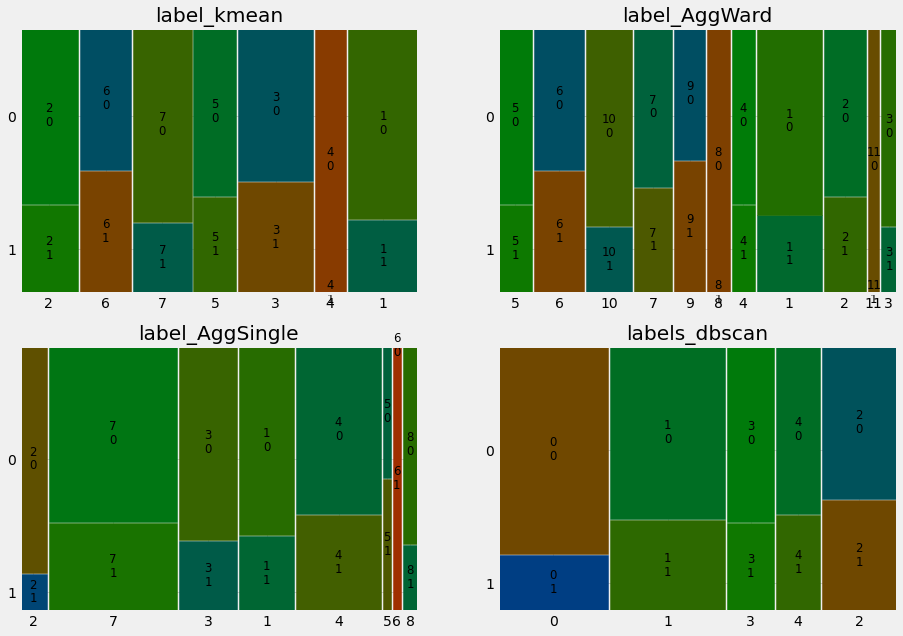

In [186]:
#describing the segments using personal loan taken
describe_var('Personal loan')

we observe that every p value is greater than 0.05 which ==> Personal loan is not signigicant

Stat for  kmean
------------------------------
chi-squared = 18.90694912621907
p value= 0.004323701932745229
degrees of freedom = 6

Stat for  AggWard
------------------------------
chi-squared = 20.629016182289426
p value= 0.023834245428610474
degrees of freedom = 10

Stat for  AggSingle
------------------------------
chi-squared = 12.322904471291569
p value= 0.09042763546826064
degrees of freedom = 7

Stat for  dbscan
------------------------------
chi-squared = 20.36714804704091
p value= 0.0004225816282878953
degrees of freedom = 4



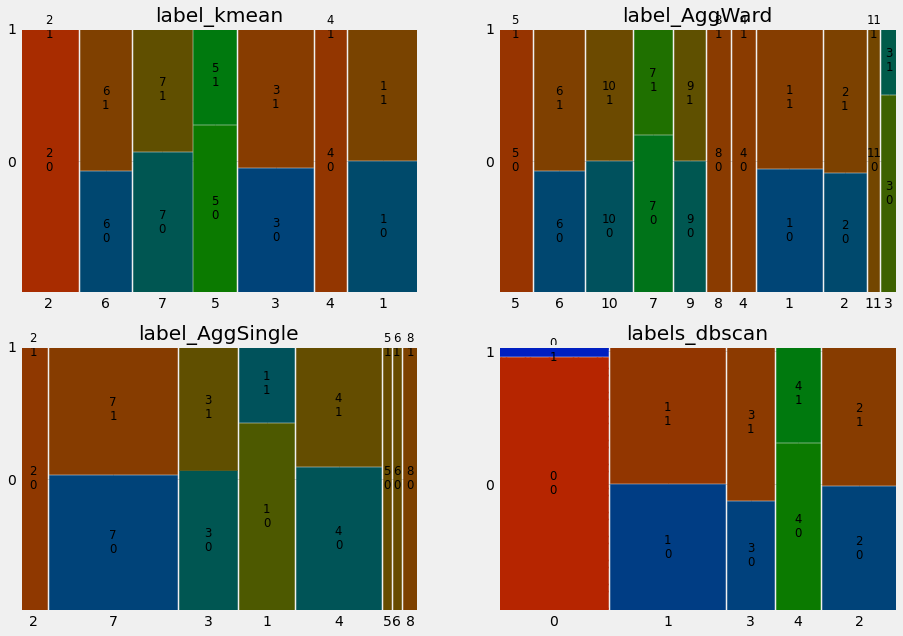

In [201]:
describe_var('House Loan')

Expect  AggWard others have p value < 0.05


kmeans --> 2nd cluster no or very less no. of home loans taken


AggSingle ---> 2nd ,5th,6th,8th cluster have no or very less no. of home loans taken


dbscan --> 0th cluster has no or very less no. of home loans taken

Stat for  kmean
------------------------------
chi-squared = 20.961499491442318
p value= 0.0018640656356233144
degrees of freedom = 6

Stat for  AggWard
------------------------------
chi-squared = 22.467135046767044
p value= 0.012893886847228891
degrees of freedom = 10

Stat for  AggSingle
------------------------------
chi-squared = 19.53149403787702
p value= 0.006675716201085303
degrees of freedom = 7

Stat for  dbscan
------------------------------
chi-squared = 6.426141101243431
p value= 0.16950398843802988
degrees of freedom = 4



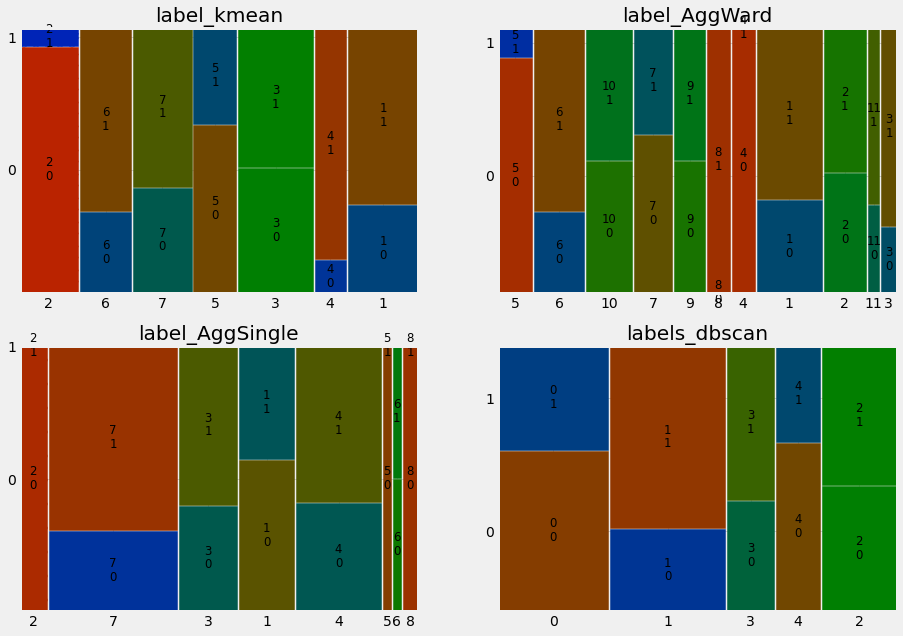

In [182]:
describe_var('Wife Working')

Expect dbscan every other clustering has some dependence with wife working

kmeans --> segment2 very less no of wife working , segment4 wife working number is great

Aggward --> segment5 women not working is more

AggSingle --> segment7 has more women working ,while segment2 ,5,8 has less women working